## Understanding the relationship between high-dimensional data points using manifold learning

* Manifold learning is often used is in understanding the relationship between high-dimensional data points. 
* A common case of high-dimensional data is images: for example, a set of images with 1,000 pixels each can be thought of as a collection of points in 1,000 dimensions – the brightness of each pixel in each image defines the coordinate in that dimension.
    
 https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

### Import Libraries

In [14]:
import numpy as np
import pandas as pd

import pylab
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.datasets import load_digits

### Load, explore data
* 1797 images with 64 pixels. 
* The images can be thought of as data points in a 64-dimensional space.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [15]:
from sklearn.datasets import load_digits

digits = load_digits()

In [16]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

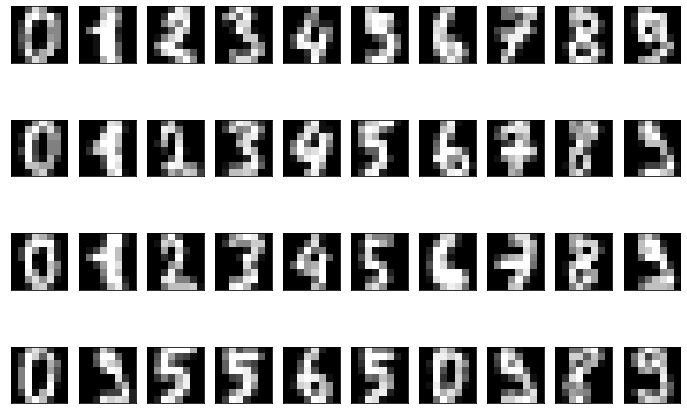

In [17]:
fig, ax = plt.subplots(4, 10, figsize = (12, 8), subplot_kw = dict(xticks = [], yticks = []))

for i, axi in enumerate(ax.flat):
    axi.imshow( digits.images[i], cmap = 'gray')

In [18]:
X = digits.data

y = digits.target

In [19]:
X.shape

(1797, 64)

In [20]:
pd.DataFrame(X).sample(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
637,0.0,0.0,3.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,16.0,1.0,0.0,0.0,0.0
758,0.0,0.0,0.0,8.0,14.0,15.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,7.0,0.0,0.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0
1215,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,0.0,...,15.0,1.0,0.0,0.0,1.0,14.0,16.0,14.0,2.0,0.0
1516,0.0,0.0,4.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,2.0,11.0,16.0,11.0,0.0,0.0
227,0.0,0.0,0.0,1.0,16.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,15.0,12.0,0.0,0.0
691,0.0,0.0,1.0,9.0,15.0,15.0,1.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,12.0,13.0,4.0,0.0,0.0
1526,0.0,0.0,2.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,16.0,7.0,0.0,0.0,0.0
481,0.0,0.0,0.0,6.0,14.0,8.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,8.0,14.0,16.0,9.0,0.0
150,0.0,0.0,2.0,12.0,4.0,0.0,0.0,0.0,0.0,1.0,...,10.0,0.0,0.0,0.0,4.0,14.0,15.0,7.0,0.0,0.0


In [21]:
y.shape

(1797,)

In [22]:
pd.DataFrame(y).sample(10)

,0
488,5
1492,2
1127,4
1059,0
711,6
775,8
1654,2
1231,5
1747,1
794,8


### Find principle components
* RandomizedPCA: Principal component analysis (PCA) using randomized SVD

In [23]:
from sklearn.decomposition import PCA

model = PCA(50).fit(X)

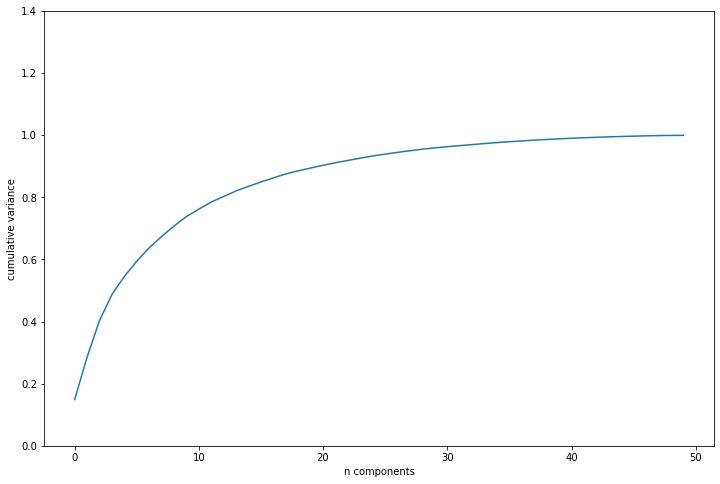

In [24]:
plt.figure( figsize = (12, 8))
plt.plot(np.cumsum(model.explained_variance_ratio_ ))

pylab.ylim([0, 1.4])

plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [25]:
classes = list(range(10))
target_names = digits.target_names

def apply_manifold_learning(X, y, method):
    
    X = method.fit_transform(X)
    
    print ("New shape of X : ", X.shape)
    print()
    print ("Sample X : \n")
    print (pd.DataFrame(X).sample(10))
    print()
    
    fig, ax = plt.subplots(figsize = (12, 8))
    for i, target_name in zip(classes, target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], 
                    label = target_name, 
                    cmap = plt.cm.Spectral, s=100)

    plt.xlabel('Component 1')
    plt.ylabel('Component 2');

    plt.legend()
    plt.show()
    
    return method

### Apply MDS

* More than 50 components are required to preserve 90% of the variance
* The data is intrinsically very high dimensional
* It can't be described linearly with just a few components.

* When this is the case, nonlinear manifold embeddings can be used to get a two-dimensional projection of all the input images
* Apply mds to get two components
* n_init : Number of times the SMACOF algorithm will be run with different initializations. The final results will be the best output of the runs, determined by the run with the smallest final stress.
* max_iter : Maximum number of iterations of the SMACOF algorithm for a single run.

New shape of X :  (1797, 2)

Sample X : 

             0         1
1389  0.052030 -0.246737
1200  0.034075 -0.601584
1577  0.078913  0.673904
1160  0.339404 -0.268615
1735 -0.264956 -0.282291
1018  0.370791 -0.129802
1422  0.332838 -0.487212
1479 -0.394040 -0.335951
1046  0.281911  0.564986
221   0.319106  0.345524



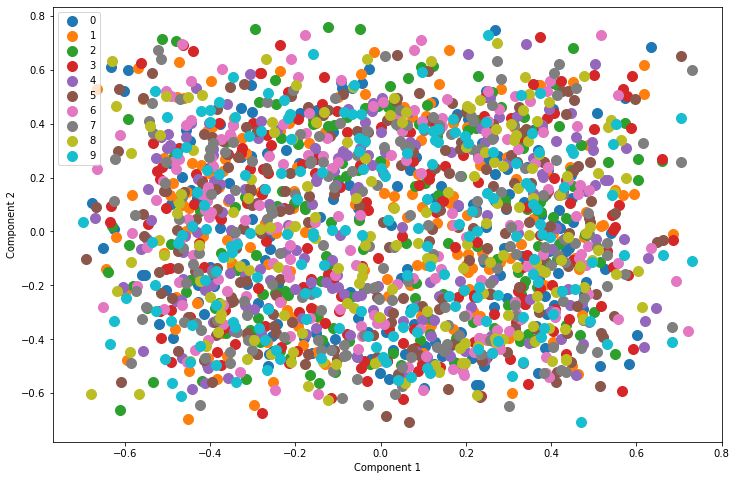

In [26]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X, y, 
      MDS(n_components = 2, metric = False, n_init = 1, max_iter = 100))

New shape of X :  (1797, 2)

Sample X : 

              0          1
1431   6.748084 -32.704123
1368 -18.679421  36.068401
1578 -19.845005  -5.710762
522   -3.534838 -26.041149
796   20.550362 -29.076691
504  -28.402373  22.150474
76   -16.425877   4.140686
1621 -35.109368   4.028853
1328 -11.635639 -40.146289
1451  22.339831 -21.894057



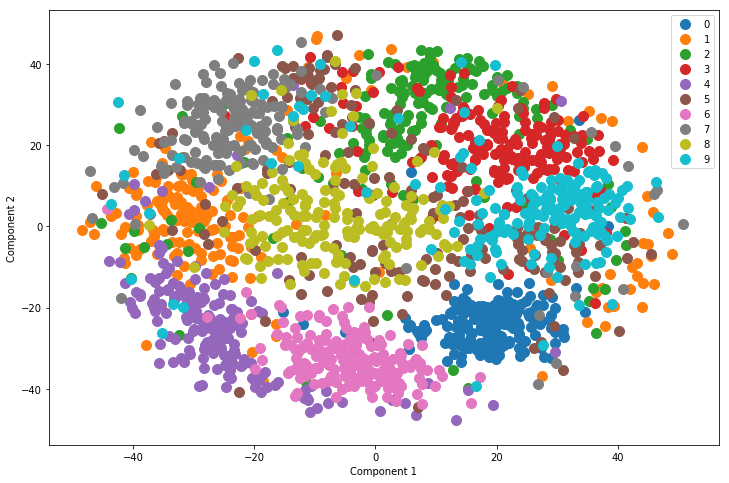

In [17]:
mds = apply_manifold_learning(X, y, 
      MDS(n_components = 2, metric = True, n_init = 1, max_iter = 100))

## Isomap

New shape of X :  (1797, 2)

Sample X : 

              0          1
209   80.591455  13.530965
1102 -22.834668 -38.483688
288   15.893777  -6.778174
1588 -46.938802 -32.333653
1301  47.028269  58.625956
414   17.339264  -9.446175
902   67.791358  22.108342
1369  47.446180  16.814525
237   -3.529557  24.149116
1314 -77.112585  -5.674302



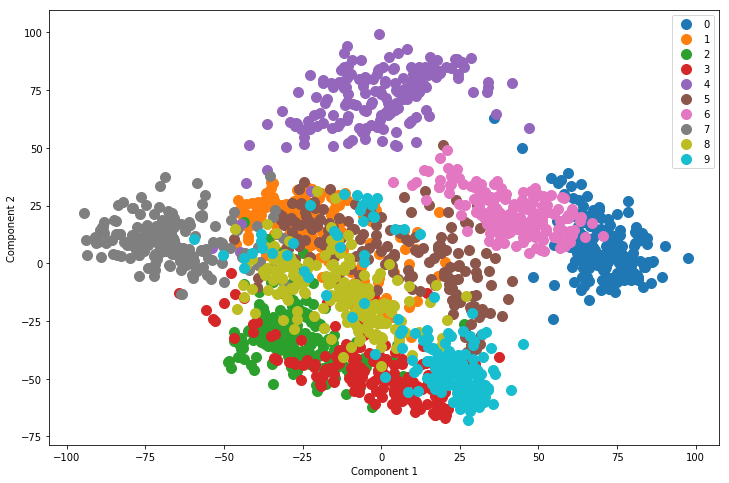

In [18]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, y, Isomap(n_neighbors = 30, n_components = 2))

### Apply LLE

New shape of X :  (1797, 2)

Sample X : 

             0         1
249  -0.021554 -0.074730
825  -0.002855 -0.010089
473  -0.001380 -0.005734
103   0.072992  0.039496
1760  0.008386 -0.005389
1553  0.027816 -0.006654
1214 -0.015710  0.017244
1519 -0.023551  0.019769
800  -0.008341  0.003529
403   0.009251  0.035439



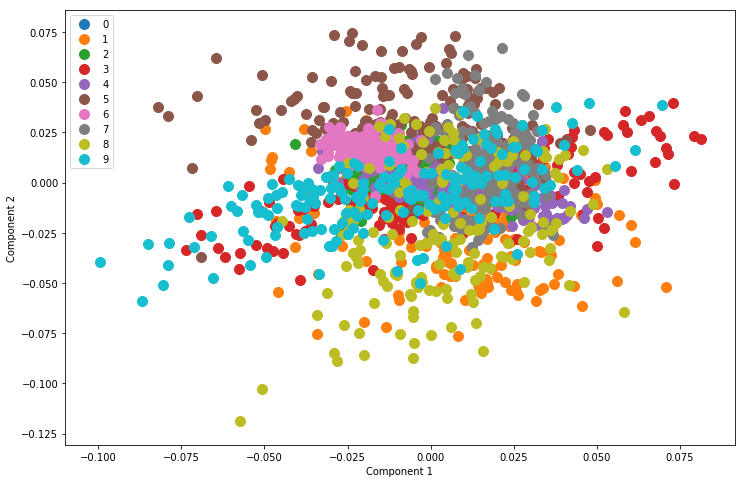

In [19]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, y, \
    LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'standard'))

New shape of X :  (1797, 2)

Sample X : 

             0         1
913   0.008075  0.004613
1041  0.011218  0.007842
1444  0.003334  0.008833
1212 -0.070532  0.004988
897   0.002777  0.003444
477   0.006790  0.008726
474   0.003985 -0.067730
1633  0.009560  0.012480
1345  0.002648 -0.062512
1324  0.003429  0.008935



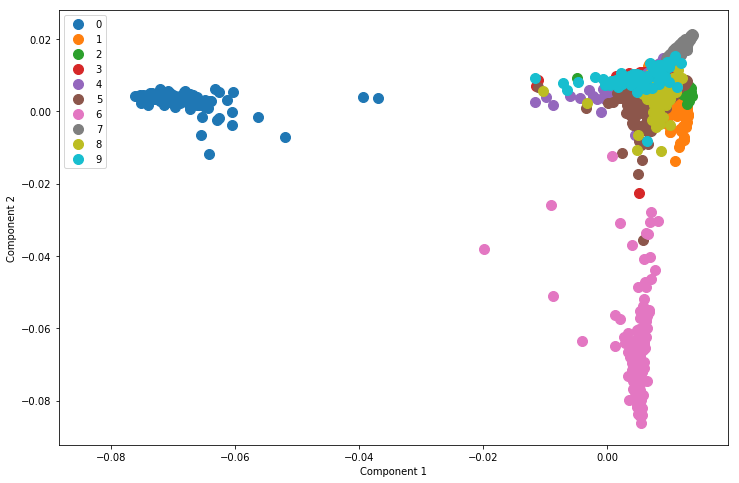

In [20]:
lle = apply_manifold_learning(X, y, \
    LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'modified'))

### Apply HLLE

New shape of X :  (1797, 2)

Sample X : 

             0         1
268   0.011474  0.009379
1148  0.005639  0.000538
436   0.011340  0.009079
1375  0.006750 -0.073658
1403  0.010809  0.011619
1566  0.007435  0.012198
879   0.007086  0.011203
1122  0.006216 -0.077070
2     0.009397  0.004815
1500  0.007029  0.009052



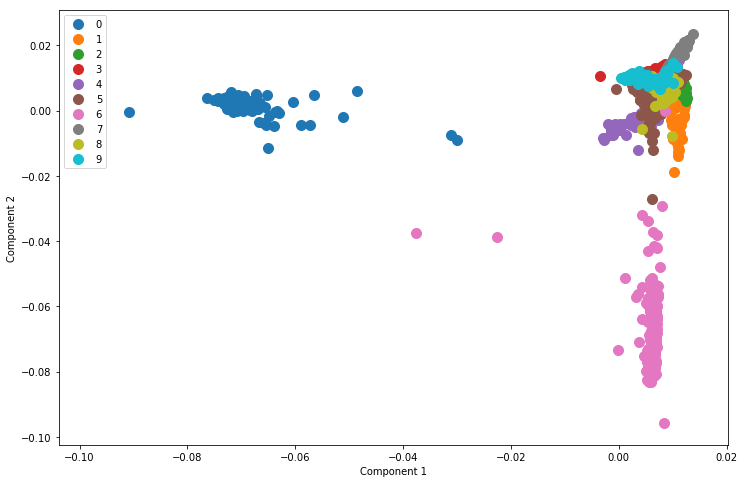

In [21]:
hlle = apply_manifold_learning(X, y, \
    LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'hessian'))

New shape of X :  (1797, 2)

Sample X : 

             0         1
388  -0.001574 -0.000507
225  -0.000105  0.002307
1315 -0.001385  0.000724
40   -0.001334  0.000228
1694 -0.001792  0.001446
658  -0.001517 -0.000932
1330 -0.001631  0.000840
280   0.000592  0.002540
1301  0.002605  0.000995
1134 -0.001203  0.001139



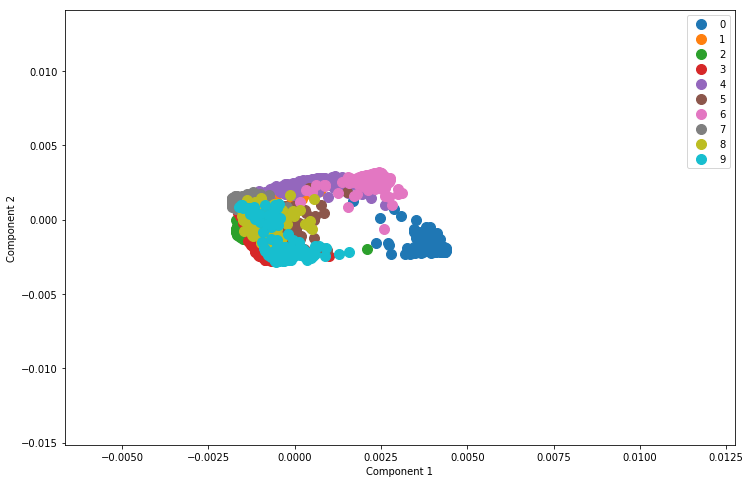

In [22]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, y, \
    SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

New shape of X :  (1797, 2)

Sample X : 

              0          1
612   12.881795  -6.290986
1768  10.135996  54.614944
1431  31.385880  29.910965
647   18.953918 -19.691128
1426  36.567886  -7.506657
1568 -19.925959  -4.368428
1181  66.338142  -4.261751
660   49.323059  -0.154332
1698 -29.256275  27.258629
139  -30.504858  24.988169



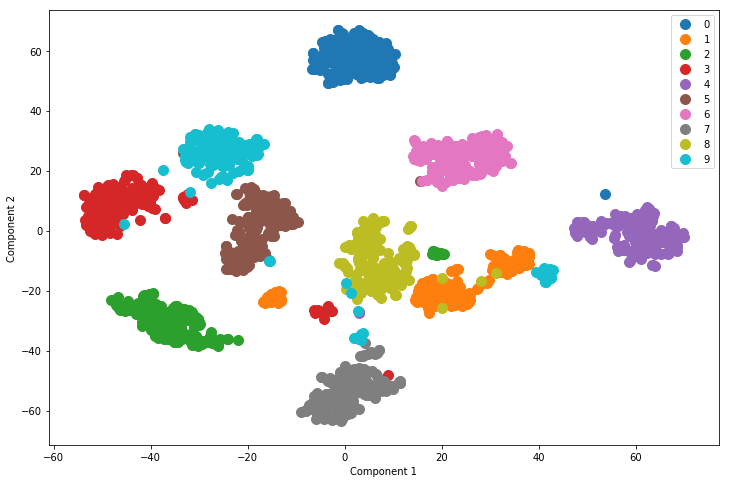

In [23]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, y, TSNE(n_components = 2, init = 'pca', random_state = 0))